# Import KBase and cFBA

In [1]:
# import kbase
import os
local_cobrakbase_path = 'C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\Internships\\Agronne\\cobrakbase'
os.environ["HOME"] = local_cobrakbase_path
import cobrakbase
token = 'WE6CHYRDTJSGOHFIDGPE7WYFT6PRPXJL'
kbase = cobrakbase.KBaseAPI(token)

ftp_path = '../../../ModelSEEDDatabase'

# import cFBA
%run ../../modelseedpy/core/mscommunity.py
%matplotlib inline

cobrakbase 0.2.8


# 2-member Zahmeeth model

## Unconstained model

### Define and execute the model

In [30]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg
%run ../../modelseedpy/core/mscommunity.py

model = kbase.get_from_ws("CMM_iAH991V2_iML1515.kb",40576)
media = kbase.get_from_ws("Btheta_Ecoli_minimal_media",40576)
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.gapfill(media)
solution = cfba.run(media)
cfba.compute_interactions(solution)
# cfba.visualize()

,IDs,Metabolites/Species,Environment,Species1,Species2
0,cpd03161_e0,Phenethylamine_e0,0,0.0,0
1,cpd01155_e0,Cadaverine_e0,0,0.0,0
2,cpd00130_e0,L-Malate_e0,0,0.0,0
3,cpd04273_e0,Deferoxamine_e0,0,0.0,0
4,cpd02361_e0,4-Hydroxyphenylacetaldehyde_e0,0,0.0,0
...,...,...,...,...,...
509,1,Species1,1.733538,0,8.478099
510,2,Species2,5.506924,9.507136,0
511,Environment,Environment,0,13.364661,16.75433
512,1,Species1 list,D-Glucose_e0,H2_e0; NH3_e0; D-Lactate_e0; CO2_e0,L-Aspartate_e0; Pyruvate_e0; H2O_e0


## FullThermo-constrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.1743969883599166
species 2 drain-flux objective value: 0.16925387417839616

Model objective value: 0.0



Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0




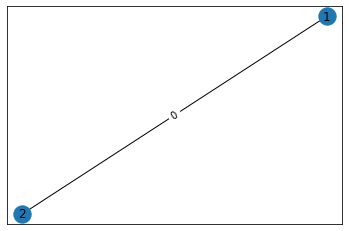

In [3]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["CMM_iAH991V2_iML1515.kb",40576]
mediaInfo_2 = ["Btheta_Ecoli_minimal_media",40576]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

# 3-member Electrosynth model

## Unconstrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
species 1 drain-flux objective value: 2.066246891916704
species 2 drain-flux objective value: 6.182228448150425
species 3 drain-flux objective value: 6.145662130043192

Model objective value: 3.766216581357344



Production matrix:
                1            2            3
Donor                                      
1        0.000000   526.567332   681.068788
2      615.130758     0.000000  2492.677015
3      145.763634  2307.900404     0.000000


Consumption matrix:
                   1            2            3
Receiver                                      
1           0.000000   615.130758   145.763634
2         526.567332     0.000000  2307.900404
3         681.068788  2492.677015     0.000000




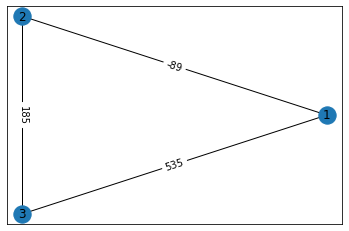

In [4]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['electrosynth_comnty.mdl.gf.2021',93204]
mediaInfo_2 = ["CO2_minimal",93204]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
species 1 drain-flux objective value: 2.066246891916704
species 2 drain-flux objective value: 6.182228448150425
species 3 drain-flux objective value: 6.145662130043192

Model objective value: 0.0



Production matrix:
         1    2    3
Donor               
1      0.0  0.0  0.0
2      0.0  0.0  0.0
3      0.0  0.0  0.0


Consumption matrix:
            1    2    3
Receiver               
1         0.0  0.0  0.0
2         0.0  0.0  0.0
3         0.0  0.0  0.0




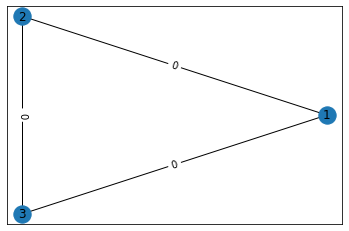

In [5]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['electrosynth_comnty.mdl.gf.2021',93204]
mediaInfo_2 = ["CO2_minimal",93204]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

# 2-member Aimee model

## Unconstrained model

### Chitin media

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.


Model objective value: 0.0



Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0




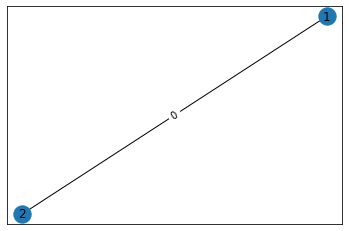

In [6]:
# import the model
%run ../../modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media) 
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.


Model objective value: 0.0



Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0




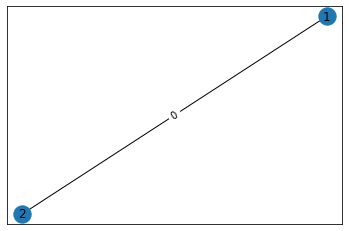

In [7]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

# 7-member Hotlake model

## Unconstrained model

### Define and execute the model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
Making biomass drain: cpd11416_c4
Making biomass drain: cpd11416_c5
Making biomass drain: cpd11416_c6
Making biomass drain: cpd11416_c7
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0
species 3 drain-flux objective value: 0.0
species 4 drain-flux objective value: 0.0
species 5 drain-flux objective value: 0.0
species 6 drain-flux objective value: 0.0
species 7 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.


Model objective value: 0.0



Production matrix:
         1    2    3    4    5    6    7
Donor                                   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0
5      0.0  0.0  0.0  0.0  0.0  0.0  0.0
6      0.0  0.0  0.0  0.0  0.0  0.0  0.0
7      0.0  0.0  0.0  0.0  0.0  0.0  0.0


Consumption matrix:
            1    2    3    4    5    6    7
Receiver                                   
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0
6         0.0  0.0  0.0  0.0  0.0  0.0  0.0
7         0.0  0.0  0.0  0.0  0.0  0.0  0.0




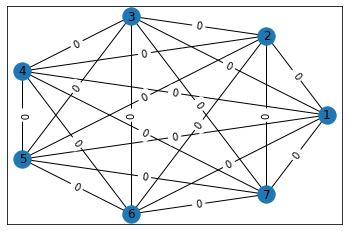

In [8]:
# import the model
%run ../../modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["Hot_Lake_seven.mdl",93544]
mediaInfo_2 = ["HotLakeMedia",93544]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

In [ ]:
# import the model
%run ../../modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["Hot_Lake_seven.mdl",93544]
mediaInfo_2 = ["HotLakeMedia",93544]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes(media)
cfba.gapfill(media)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path, verbose = False)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
Making biomass drain: cpd11416_c4
Making biomass drain: cpd11416_c5
Making biomass drain: cpd11416_c6
Making biomass drain: cpd11416_c7
species 1 drain-flux objective value: 0.0
species 2 drain-flux objective value: 0.0
species 3 drain-flux objective value: 0.0
species 4 drain-flux objective value: 0.0
species 5 drain-flux objective value: 0.0
species 6 drain-flux objective value: 0.0
species 7 drain-flux objective value: 0.0


/usr/local/lib/python3.8/dist-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.

